## Assignment 2 - Question 3:
Increase n estimators

Submitted by - Parag Shah

### 1. Import packages and read data

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from pandas.api.types import is_string_dtype,is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
path = %pwd
print(path)

/Users/paragshah/Desktop/Semester 1/INFO 6105 DS/Assignments/Assignment_2_Parag/Question 3


In [4]:
df = pd.read_csv(f'{path}/Titanic_full.csv')
print(df.shape)
df.head(2)

(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### 2. Splitting & Preprocess data

In [6]:
'''Split train + valid data and test data'''

def mydf_splitter(my_df,num_rows):
    return my_df[:num_rows].copy(),my_df[num_rows:]


mydf_train_valid,mydf_test = mydf_splitter(df,1113)

print(mydf_train_valid.shape,mydf_test.shape)

(1113, 12) (196, 12)


Let's delete the columns which Name, Cabin and Ticket as these seem to have little impact on the output that we are trying to predict.

In [7]:
mydf_train_valid1 = mydf_train_valid.drop(["Cabin"],axis = 1)
print(mydf_train_valid1.shape)
mydf_train_valid1.head(3)

(1113, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


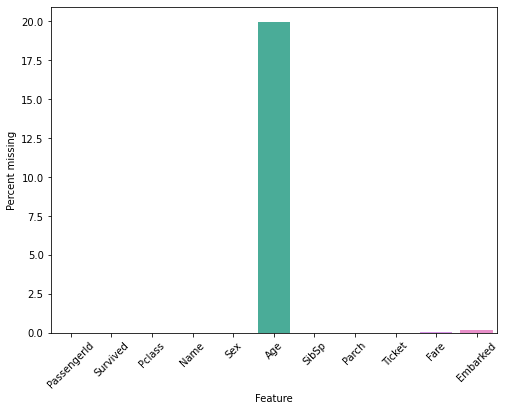

In [10]:
''' Deal with missing values. First, calculate the percentage of
missing values for every column, and plot them as a bar chart'''

null_vals = mydf_train_valid1.isnull().sum()/len(mydf_train_valid1)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

In [11]:
# We define a function to convert object types and string types to category type

def str_to_cat(my_df):
    for p,q in my_df.items(): #my_df.items() is a generator in Python
        if is_string_dtype(q): 
            my_df[p] = q.astype('category').cat.as_ordered()
    return my_df

In [12]:
# Apply the str_to_cat function
mydf_train_valid2 = str_to_cat(mydf_train_valid1)
print(mydf_train_valid2.shape)
mydf_train_valid2.head(3)

(1113, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [13]:
mydf_train_valid2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1113 non-null   int64   
 1   Survived     1113 non-null   int64   
 2   Pclass       1113 non-null   int64   
 3   Name         1113 non-null   category
 4   Sex          1113 non-null   category
 5   Age          891 non-null    float64 
 6   SibSp        1113 non-null   int64   
 7   Parch        1113 non-null   int64   
 8   Ticket       1113 non-null   category
 9   Fare         1112 non-null   float64 
 10  Embarked     1111 non-null   category
dtypes: category(4), float64(2), int64(5)
memory usage: 162.8 KB


In [15]:
# Converting String values to numbers
def mydf_to_nums(my_df, feature, null_status):
    if not is_numeric_dtype(feature):
        my_df[null_status] = feature.cat.codes + 1

def mydf_imputer(my_df, feature, null_status, null_table):
    if is_numeric_dtype(feature):
        if pd.isnull(feature).sum() or (null_status in null_table):
            my_df[null_status+'_na'] = pd.isnull(feature)
            filler = null_table[null_status] if null_status in null_table else feature.median()
            my_df[null_status] = feature.fillna(filler)
            null_table[null_status] = filler
    return null_table   

def mydf_preprocessor(my_df, null_table):
    '''null_table  = your table or None'''
    
    if null_table is None: 
        null_table = dict()
    for p,q in my_df.items(): 
        null_table = mydf_imputer(my_df, q, p, null_table)
    for p,q in my_df.items(): 
        mydf_to_nums(my_df, q, p)
    my_df = pd.get_dummies(my_df, dummy_na = True)
    res = [my_df, null_table]
    return res

In [16]:
mydf_train_valid3,my_table = mydf_preprocessor(mydf_train_valid2,null_table = None)
print(mydf_train_valid3.shape)
mydf_train_valid3.head(3)

(1113, 13)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_na,Fare_na
0,1,0,3,137,2,22.0,1,0,635,7.2500,3,False,False
1,2,1,1,247,1,38.0,1,0,719,71.2833,1,False,False
2,3,1,3,449,1,26.0,0,0,807,7.9250,3,False,False


In [17]:
my_table

{'Age': 28.0, 'Fare': 14.45625}

In [19]:
y_train_valid = mydf_train_valid3["Survived"]
x_train_valid = mydf_train_valid3.drop(["Survived"],axis = 1)
print(x_train_valid.shape,y_train_valid.shape)

(1113, 12) (1113,)


In [21]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid, y_train_valid, random_state=1)
print(x_train.shape,x_valid.shape,y_train.shape,y_valid.shape)

(834, 12) (279, 12) (834,) (279,)


### 3. Random Forest: Different n estimators

In [36]:
# n_estimators = 10
mod_1 = RandomForestClassifier(n_jobs = -1, n_estimators = 10, max_depth = 3, bootstrap = True)
mod_1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [37]:
y_pred1 = mod_1.predict(x_valid)
accuracy_score(y_valid,y_pred1)

0.7204301075268817

In [38]:
# n_estimators = 50
mod_2 = RandomForestClassifier(n_jobs = -1, n_estimators = 50, max_depth = 3, bootstrap = True)
mod_2.fit(x_train,y_train)
y_pred2 = mod_2.predict(x_valid)
accuracy_score(y_valid,y_pred2)

0.7419354838709677

In [39]:
# n_estimators = 100
mod_3 = RandomForestClassifier(n_jobs = -1, n_estimators = 100, max_depth = 3, bootstrap = True)
mod_3.fit(x_train,y_train)
y_pred3 = mod_3.predict(x_valid)
accuracy_score(y_valid,y_pred3)

0.7491039426523297

In [40]:
# n_estimators = 1000
mod_4 = RandomForestClassifier(n_jobs = -1, n_estimators = 1000, max_depth = 3, bootstrap = True)
mod_4.fit(x_train,y_train)
y_pred4 = mod_4.predict(x_valid)
accuracy_score(y_valid,y_pred4)

0.7526881720430108

In [42]:
# n_estimators = 2000
mod_5 = RandomForestClassifier(n_jobs = -1, n_estimators = 2000, max_depth = 3, bootstrap = True)
mod_5.fit(x_train,y_train)
y_pred5 = mod_5.predict(x_valid)
accuracy_score(y_valid,y_pred5)

0.7562724014336918

#### This shows increasing the n_estimators increases the accuracy score

### 4. Testing

In [52]:
'''Preprocess test set exactly like the train and validation sets'''

mydf_test1 = mydf_test.drop(["Cabin"],axis = 1)
print(mydf_test1.shape)
mydf_test1.head(3)

(196, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1113,1114,0,2,"Cook, Mrs. (Selena Rogers)",female,22.0,0,0,W./C. 14266,10.5000,S
1114,1115,0,3,"Karlsson, Mr. Einar Gervasius",male,21.0,0,0,350053,7.7958,S
1115,1116,1,1,"Candee, Mrs. Edward (Helen Churchill Hungerford)",female,53.0,0,0,PC 17606,27.4458,C


In [53]:
mydf_test2 = str_to_cat(mydf_test1)
mydf_test2.Sex.cat.categories

Index(['female', 'male'], dtype='object')

In [54]:
mydf_test2,my_table1 = mydf_preprocessor(mydf_test1, null_table = my_table)
print(mydf_test2.shape)
mydf_test2.head(3)

(196, 13)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_na,Fare_na
1113,1114,0,2,36,1,22.0,0,0,183,10.5000,3,False,False
1114,1115,0,3,91,2,21.0,0,0,104,7.7958,3,False,False
1115,1116,1,1,24,1,53.0,0,0,161,27.4458,1,False,False


In [55]:
# Now, let's split out the X and Y variables (vertical split of the dataframe)

x_test = mydf_test2.drop('Survived', axis=1)
y_test = mydf_test2['Survived']
print(x_test.shape,y_test.shape)

(196, 12) (196,)


In [56]:
y_pred_test1 = mod_1.predict(x_test)
accuracy_score(y_test,y_pred_test1)

0.4642857142857143

In [57]:
y_pred_test2 = mod_2.predict(x_test)
accuracy_score(y_test,y_pred_test2)

0.4846938775510204

In [58]:
y_pred_test3 = mod_3.predict(x_test)
accuracy_score(y_test,y_pred_test3)

0.47959183673469385

In [59]:
y_pred_test4 = mod_4.predict(x_test)
accuracy_score(y_test,y_pred_test4)

0.4846938775510204

In [60]:
y_pred_test5 = mod_5.predict(x_test)
accuracy_score(y_test,y_pred_test5)

0.45918367346938777

#### End of file